# Unsupervised Learning Presentation

# Imports : 

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering, DBSCAN
from sklearn.decomposition import PCA, MiniBatchDictionaryLearning, DictionaryLearning, NMF, FastICA, FactorAnalysis, LatentDirichletAllocation
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)

# Open Unlabelled file : 

In [2]:
features_unsupervised = pd.read_csv("features_unsupervised.csv", sep=";")

# Unsupervised Feature Selection

First, we are going to look at the features that have the lowest variance. We will then remove these features from the dataset.

original features shape:
(1000, 66)


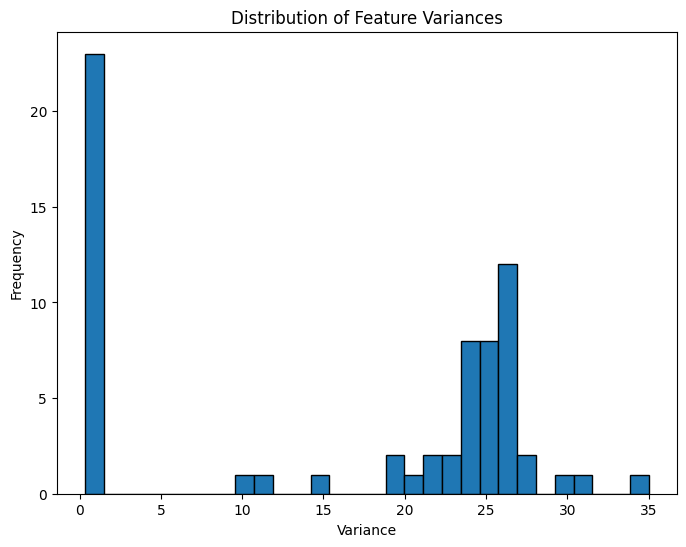

In [3]:
print('original features shape:')
print(features_unsupervised.shape)

thr = 0 
selector = VarianceThreshold(threshold=thr)
features_unsupervised_new = selector.fit_transform(features_unsupervised)
variances = selector.variances_

plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


We could think that the features with the lowest variance on this chart are to be removed. However, we did not take into account the fact that the features are not scaled. 

Let's do this now : 

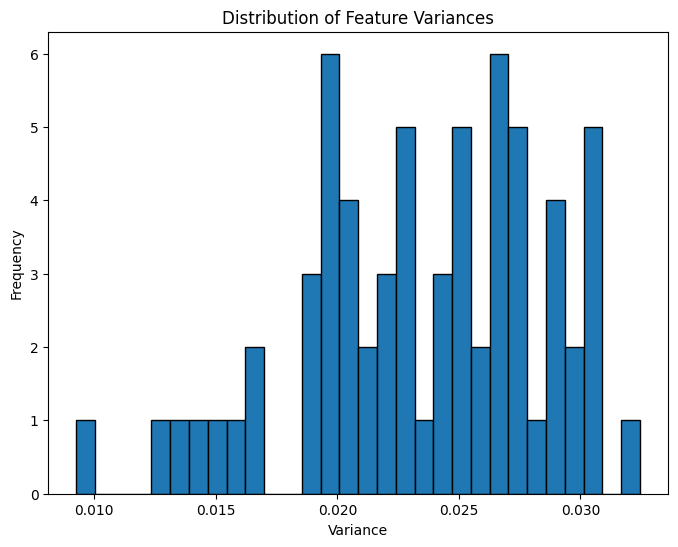

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features_unsupervised DataFrame
features_unsupervised_normalized = scaler.fit_transform(features_unsupervised)

# Reconstruct DataFrame with normalized values
features_unsupervised_normalized_df = pd.DataFrame(features_unsupervised_normalized, columns=features_unsupervised.columns, index=features_unsupervised.index)

thr = 0 
selector = VarianceThreshold(threshold=thr)
features_unsupervised_normalized_new = selector.fit_transform(features_unsupervised_normalized_df)
variances = selector.variances_
plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Find the threshold to remove the given percentage of features
perc_toremove = 5
thresh_perc = np.percentile(variances, perc_toremove)
print("Threshold to remove {}% of features: {}".format(perc_toremove, thresh_perc))

# Initialize VarianceThreshold with the calculated threshold
selector = VarianceThreshold(threshold=thresh_perc)

# Fit and transform the data to select features
features_unsupervised_normalized_reduced = selector.fit_transform(features_unsupervised_normalized_df)

# Get the selected features mask
selected_features_mask = selector.get_support()

# Get the selected columns
selected_columns = features_unsupervised_normalized_df.columns[selected_features_mask]

# Reconstruct DataFrame with selected features
features_unsupervised_normalized_reduced_df = pd.DataFrame(features_unsupervised_normalized_reduced, columns=selected_columns, index=features_unsupervised_normalized_df.index)


# Print original features shape
print('Original features shape:')
print(features_unsupervised_normalized_df.shape)

# Print selected features shape
print('Selected features shape:')
print(features_unsupervised_normalized_reduced_df.shape)

Threshold to remove 5% of features: 0.014378393647693452
Original features shape:
(1000, 66)
Selected features shape:
(1000, 62)


In [38]:
removed_features_indices = ~selector.get_support()  # Get indices of removed features
removed_features_names = features_unsupervised_normalized_df.columns[removed_features_indices]  # Get names of removed features

removed_features_list = removed_features_names.tolist()  # Convert to list

print(f"{len(removed_features_list)} features were removed:")
for feature_name in removed_features_list:
    print(feature_name)

# Print features with variances greater than the threshold
print(f"\nFeatures with variance greater than {thr} threshold:")
for feature_name, variance in zip(features_unsupervised_normalized_df.columns, selector.variances_):
    if variance > thr:
        print(f"{feature_name}")

4 features were removed:
 distance(rat, cheese_0)
 distance(rat, cheese_1)
 distance(python, cheese_17)
 distance(python, cheese_20)

Features with variance greater than 0 threshold:
 density(rat)
 density(python)
 distance(rat, python)
 density(cheese_0)
 distance(rat, cheese_0)
 distance(python, cheese_0)
 density(cheese_1)
 distance(rat, cheese_1)
 distance(python, cheese_1)
 density(cheese_2)
 distance(rat, cheese_2)
 distance(python, cheese_2)
 density(cheese_3)
 distance(rat, cheese_3)
 distance(python, cheese_3)
 density(cheese_4)
 distance(rat, cheese_4)
 distance(python, cheese_4)
 density(cheese_5)
 distance(rat, cheese_5)
 distance(python, cheese_5)
 density(cheese_6)
 distance(rat, cheese_6)
 distance(python, cheese_6)
 density(cheese_7)
 distance(rat, cheese_7)
 distance(python, cheese_7)
 density(cheese_8)
 distance(rat, cheese_8)
 distance(python, cheese_8)
 density(cheese_9)
 distance(rat, cheese_9)
 distance(python, cheese_9)
 density(cheese_10)
 distance(rat, cheese_1

In addition to the removal of this features, we will get rid of the distance(rat, python) featur which does not hav any influence on the result of the games 

In [39]:
features_unsupervised_normalized_reduced_df = features_unsupervised_normalized_reduced_df.drop(columns=[' distance(rat, python)'])

# Print original features shape
print('Original features shape:')
print(features_unsupervised_normalized_df.shape)

# Print selected features shape
print('Selected features shape:')
print(features_unsupervised_normalized_reduced_df.shape)


Original features shape:
(1000, 66)
Selected features shape:
(1000, 61)


In [51]:
features_unsupervised_normalized_reduced2_df = features_unsupervised_normalized_reduced_df.drop([' density(cheese_{})'.format(i) for i in range(21)],axis=1)


Détermination du nombre de cluster avec la méthode du coude

Calculating Inertia:   0%|          | 0/9 [00:00<?, ?it/s]/home/aurel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Calculating Inertia:  11%|█         | 1/9 [00:00<00:00,  9.83it/s]/home/aurel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Calculating Inertia:  22%|██▏       | 2/9 [00:00<00:03,  1.90it/s]/home/aurel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Calculating Inertia:  33%|███▎      | 3/9 [00:01<00:03,  1.92it/s]/home/aurel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Calculating Inertia:  44%|████▍     | 4/9 [00:02<00:02,  1.67it/s]/home/aurel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_par

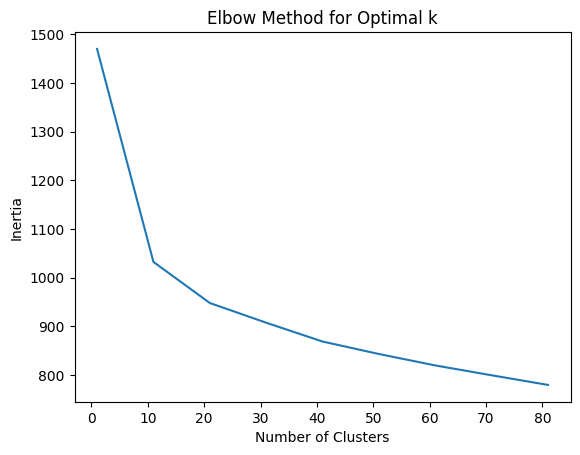

In [52]:
# Initialize an empty list to store inertias
inertias = []

# Define a range of values for n_clusters (number of clusters)
n_clusters = np.arange(1, 82, 10)

import tqdm

# Iterate through the range of n_clusters with tqdm for progress bar
for i in tqdm.tqdm(n_clusters, desc="Calculating Inertia"):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_unsupervised_normalized_reduced_df)
    inertias.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



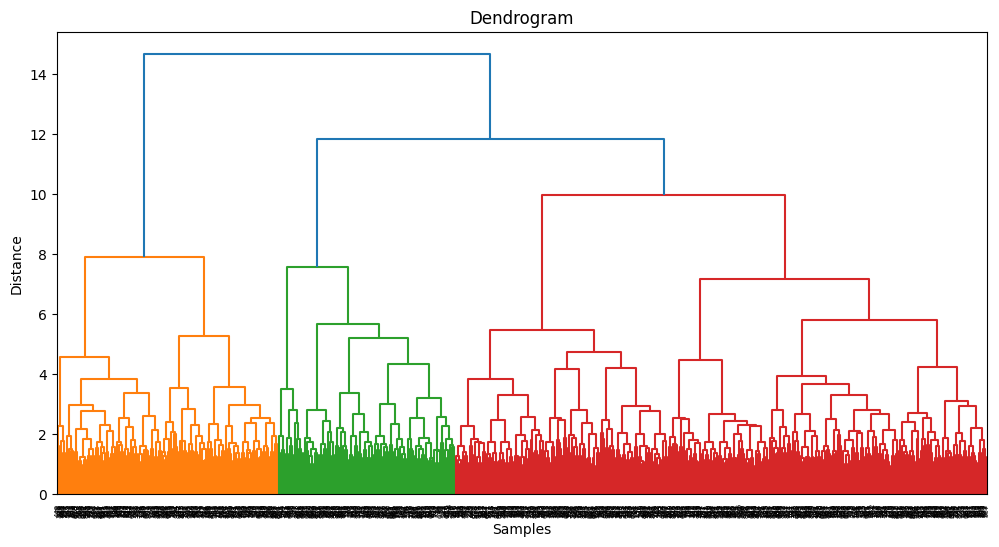

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
Z = linkage(features_unsupervised_normalized_reduced_df, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

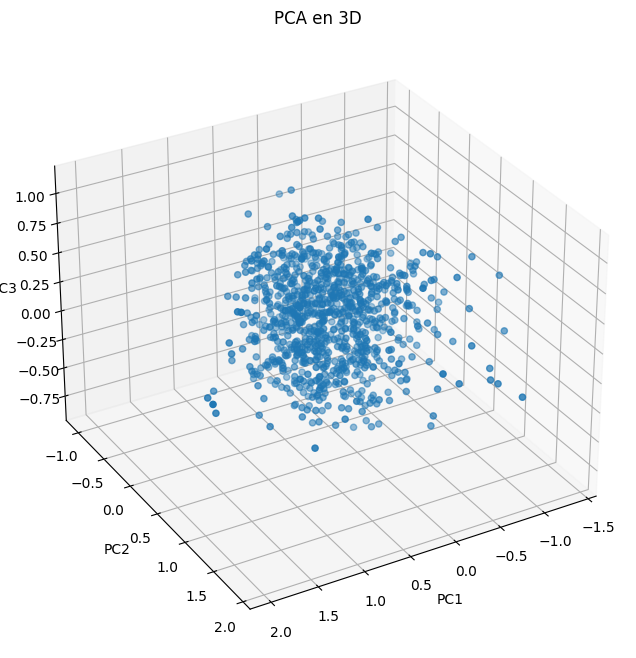

In [53]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Charger les données
# Supposons que features_unsupervised_normalized_reduced_df est déjà disponible

# Appliquer la PCA
pca = PCA(n_components=3)  # Spécifiez le nombre de composantes principales souhaitées
X_pca = pca.fit_transform(features_unsupervised_normalized_reduced2_df)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3'])

# Visualisation des données dans l'espace PCA en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA en 3D')

ax.view_init(azim=420, elev=30)  # Angle de vue initial
plt.show()


dendograme 
elbow
cluster images